# Deprecated: MMS Composition

Parker E15 Parker spiral conjunction with MMS instruments at 1AU

In [1]:
import glob
import pyspedas
from pyspedas import time_string, time_double
from pytplot import tplot, get_data, cdf_to_tplot, store_data
import astrospice
import sunpy 
import sunpy.coordinates as scoords
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord


import sys, os
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

import tools.utilities as utils
import tools.sigma as sigma
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs
from tools.plotting import plot_pfss
from tools.settings import CsvDir, ImgDir, PlotDir, DataDir


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from datetime import timedelta

# for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# REGIONS
loc_hcs = [59.5, 62]
loc_hcs1 = [357, 358.8]
ssw = [9, 19]
fsw = [42, 52]

# COLORS
scol, hcol, fcol, rcol = ['lavender', 'azure', 'lavenderblush', 'grey']
cc = ['lightpink', 'mediumspringgreen', 'peachpuff', 'powderblue', 'thistle', 'palegoldenrod']

# DIRECTORIES
RES_DIR = os.path.realpath('results')
FIG_DIR = os.path.realpath('figures')
EPS_DIR = os.path.realpath('eps_figures')
OBS_DIR = '/Users/tamarervin/products/csv_files/calcs/'
PlotDir = '/Users/tamarervin/mplstyle/'


# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 3

enc='E15'


# Read in Data

In [2]:
### MMS Composition Data
mms = pd.read_csv('results/mms.csv')
mms['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in mms.Time]


In [3]:
### MMS Bow Shock Crossings
bowshock = pd.read_csv('results/bowShockCrossings.txt', sep=', ', index_col=None)
bowshock['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in bowshock.Time]
inbound = bowshock.iloc[np.where(bowshock=='IB')[0]].copy()
outbound = bowshock.iloc[np.where(bowshock=='OB')[0]].copy()

### MMS Magnetosphere Events
magnetosphere = pd.read_csv('results/magnetosphereEventList.txt', sep=', ', index_col=None)
magnetosphere['TimeIn'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in magnetosphere.TimeIn]
magnetosphere['TimeOut'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M') for d in magnetosphere.TimeOut]


19-Dec-23 13:44:27: /var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_2148/1567417083.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bowshock = pd.read_csv('results/bowShockCrossings.txt', sep=', ', index_col=None)

19-Dec-23 13:44:27: /var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_2148/1567417083.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  magnetosphere = pd.read_csv('results/magnetosphereEventList.txt', sep=', ', index_col=None)



## Trajectory

In [4]:
import pyspedas
from pytplot import tplot
time_range = ['2023-03-21/00:00', '2023-04-01/00:00']
# pyspedas.mms.mec(trange=time_range, probe='1')

files = np.sort(glob.glob(os.path.join(os.path.realpath(os.path.join('pydata/mms1/mec/srvy/l2/epht89q/2023/03/', "*"))), recursive=True))
files

array(['/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230321_v2.2.2.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230322_v2.2.1.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230323_v2.2.1.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230325_v2.2.0.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230326_v2.2.1.cdf',
       '/Users/tamarervin/publications/e15_conjunction/pydata/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230327_v2.2.1.cdf',
      

NameError: name 'hpca' is not defined

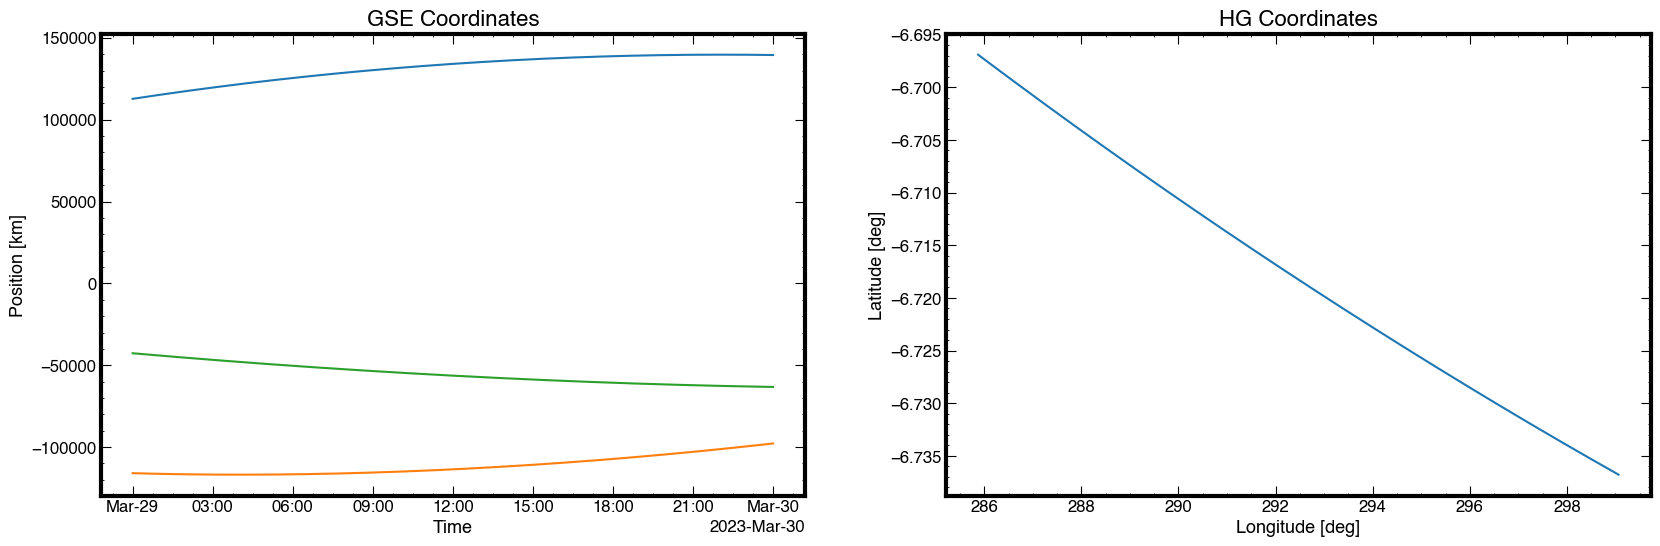

In [4]:
import pyspedas
from pytplot import tplot
time_range = ['2023-03-21/00:00', '2023-04-01/00:00']
# pyspedas.mms.mec(trange=time_range, probe='1')

files = np.sort(glob.glob(os.path.join(os.path.realpath(os.path.join('pydata/mms1/mec/srvy/l2/epht89q/2023/03/', "*"))), recursive=True))
import cdflib
data_cdf = cdflib.CDF(files[8]) ## 29
# data_cdf = cdflib.CDF(files[4]) ## 25
# data_cdf = cdflib.CDF(files[9]) ## 30

### PRINT OUT FILE INFO
# print(data_cdf.cdf_info())

### READ IN VARIABLE INFO
time = cdflib.cdfepoch.to_datetime(data_cdf.varget("Epoch"))
Xgse = data_cdf.varget("mms1_mec_r_gse")[:, 0]
Ygse = data_cdf.varget("mms1_mec_r_gse")[:, 1]
Zgse = data_cdf.varget("mms1_mec_r_gse")[:, 2]

# ### TRANSFORM TO HELIOGRAPHIC CARRINGTON
mms1_gse = SkyCoord(Xgse*u.km, Ygse*u.km, Zgse*u.km, frame=sunpy.coordinates.frames.GeocentricSolarEcliptic, representation_type='cartesian', obstime=time)
mms_carrington = mms1_gse.transform_to(
    scoords.HeliographicCarrington(observer="self"))
mms_carrington.representation_type = 'spherical'


### PLOT GSE AND HG COORDINATES
fig, axs = plt.subplots(1, 2, figsize=[20, 6])
ax = axs[0]
ax.plot(time, Xgse)
ax.plot(time, Ygse)
ax.plot(time, Zgse)
ax.set_title('GSE Coordinates')
ax.set(xlabel='Time', ylabel='Position [km]')

ax = axs[1]
ax.plot(mms_carrington.lon, mms_carrington.lat)
ax.set_title('HG Coordinates')
ax.set(xlabel='Longitude [deg]', ylabel='Latitude [deg]')

### COMPARING TO SOURCE SURFACE
use = np.logical_and(mms.Time>=pd.Timestamp('2023-03-23 00:00:00'), hpca.Time <= pd.Timestamp('2023-3-31 00:00:00'))
vtime = mms.Time[use]
vx = mms.hpvx[use]
vy = mms.hpvy[use]
vz = mms.hpvz[use]

### PROPAGATE TO SOURCE SURFACE
tt = pd.to_datetime(time)
tv = pd.to_datetime(vtime)
ts_common =  np.array([dt.timestamp() for dt in tt]) #np.array([pd.Timestamp(dt) for dt in time])
mms_vr_ts = [int(dt.timestamp()) for dt in tv] #[int(pd.Timestamp(dt)) for dt in vtime]
mms_vr_common = interp1d(mms_vr_ts, np.abs(vx), bounds_error=False)(ts_common)*u.km/u.s
mms_at_source_surface = psp_funcs.ballistically_project(mms_carrington,vr_arr=mms_vr_common, r_inner=2.5*u.R_sun)

### PLOT GSE AND HG COORDINATES
fig, axs = plt.subplots(1, 2, figsize=[20, 6])
ax = axs[0]
ax.plot(vtime, vx)
ax.plot(vtime, vy)
ax.plot(vtime, vz)
ax.set_title('Velocity - GSE Coordinates')
ax.set(xlabel='Time', ylabel='Velocity [km/s]')

ax = axs[1]
ax.plot(time, mms_at_source_surface.lon)
ax.axhline(9, c='k', linestyle='dashed')
ax.axhline(19, c='k', linestyle='dashed')
ax.axhline(fsw[0], c='k', linestyle='dashed')
ax.axhline(fsw[1], c='k', linestyle='dashed')

ax.set_title('HG Coordinates - Source Surface')
ax.set(xlabel='Time', ylabel='Longitude [deg]')


8634 2880


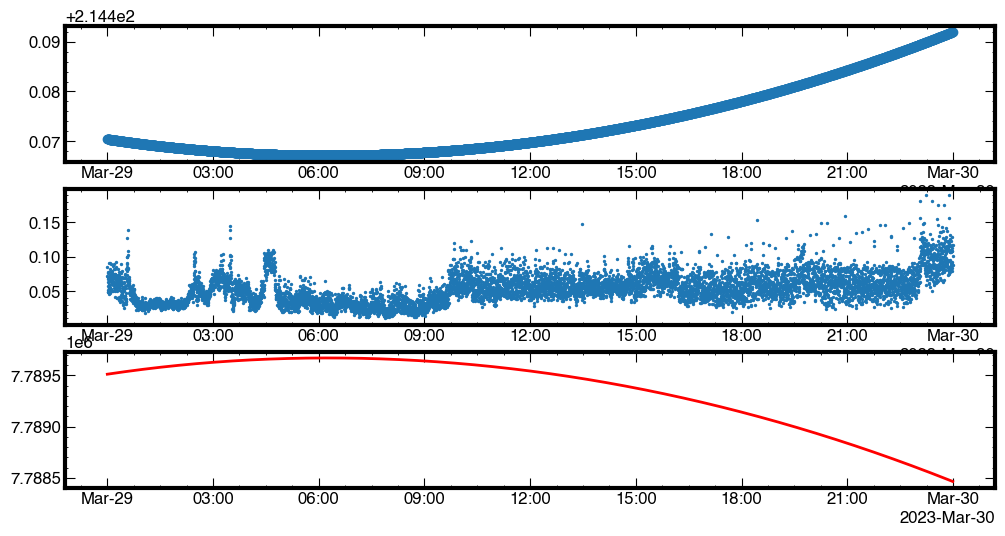

In [ ]:
use = np.logical_and(mms.Time>=pd.Timestamp('2023-03-29 00:00:00'), hpca.Time <= pd.Timestamp('2023-3-30 00:00:00'))
pressure = mms.hppress[use]
print(len(pressure), len(mms_carrington.radius))
fig, axs = plt.subplots(3, figsize=[12, 6])
rAU = mms_carrington.radius.to(u.Rsun)
axs[0].scatter(time, rAU)
axs[1].scatter(mms.Time[use], pressure, s=2)
axs[2].plot(time, 10e9 * rAU**(-4/3), lw=2, c='r')

[Text(0.5, 0, 'Longitude [deg]'), Text(0, 0.5, 'Latitude [deg]')]

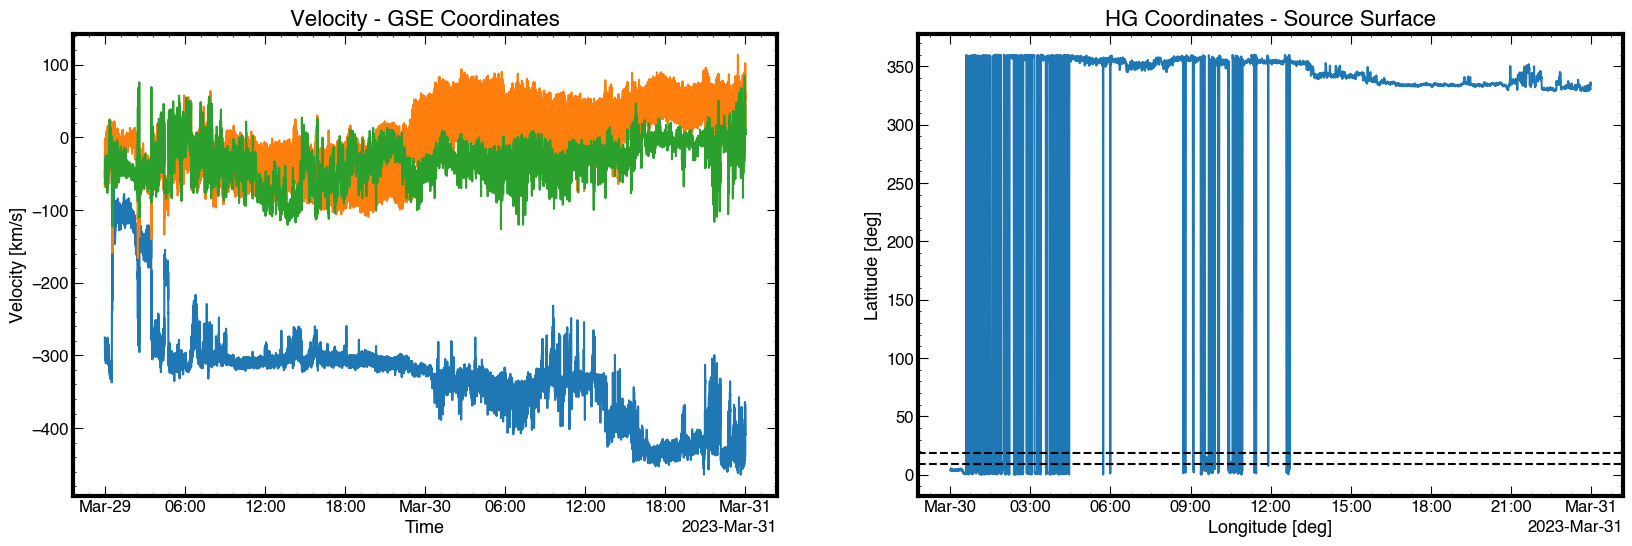

In [ ]:
### GET PROTON VELOCITY
# pyspedas.mms.hpca(trange=time_range, datatype='moments')
files = np.sort(glob.glob(os.path.join(os.path.realpath(os.path.join('pydata/mms1/hpca/srvy/l2/moments/2023/03/', "*"))), recursive=True))
# data_cdf = cdflib.CDF(files[6]) ## read in the first ion file

# ### PRINT OUT FILE INFO
# print(data_cdf.cdf_info())

### READ IN VARIABLE INFO
# vtime = cdflib.cdfepoch.to_datetime(data_cdf.varget("Epoch"))
# vx = data_cdf.varget("mms1_hpca_hplus_ion_bulk_velocity")[:, 0]
# vy = data_cdf.varget("mms1_hpca_hplus_ion_bulk_velocity")[:, 1]
# vz = data_cdf.varget("mms1_hpca_hplus_ion_bulk_velocity")[:, 2]
use = np.logical_and(hpca.Time>=pd.Timestamp('2023-03-29 00:00:00'), hpca.Time <= pd.Timestamp('2023-3-31 00:00:00'))
vtime = hpca.Time[use]
vx = hpca.hpvx[use]
vy = hpca.hpvy[use]
vz = hpca.hpvz[use]

### PROPAGATE TO SOURCE SURFACE
tt = pd.to_datetime(time)
tv = pd.to_datetime(vtime)
ts_common =  np.array([dt.timestamp() for dt in tt]) #np.array([pd.Timestamp(dt) for dt in time])
mms_vr_ts = [int(dt.timestamp()) for dt in tv] #[int(pd.Timestamp(dt)) for dt in vtime]
mms_vr_common = interp1d(mms_vr_ts, np.abs(vx), bounds_error=False)(ts_common)*u.km/u.s
mms_at_source_surface = psp_funcs.ballistically_project(mms_carrington,vr_arr=mms_vr_common, r_inner=2.5*u.R_sun)

### PLOT GSE AND HG COORDINATES
fig, axs = plt.subplots(1, 2, figsize=[20, 6])
ax = axs[0]
ax.plot(vtime, vx)
ax.plot(vtime, vy)
ax.plot(vtime, vz)
ax.set_title('Velocity - GSE Coordinates')
ax.set(xlabel='Time', ylabel='Velocity [km/s]')

ax = axs[1]
ax.plot(time, mms_at_source_surface.lon)
ax.axhline(9, c='k', linestyle='dashed')
ax.axhline(19, c='k', linestyle='dashed')

ax.set_title('HG Coordinates - Source Surface')
ax.set(xlabel='Longitude [deg]', ylabel='Latitude [deg]')

# Figure

In [ ]:
magnetosphere

,TimeIn,TimeOut
0,2023-03-17 00:21:00,2023-03-17 00:26:00
1,2023-03-17 00:50:00,2023-03-17 19:40:00
2,2023-03-20 13:18:00,2023-03-21 07:06:00
3,2023-03-21 07:15:00,2023-03-21 07:25:00
4,2023-03-23 17:01:00,2023-03-23 17:22:00
5,2023-03-24 02:00:00,2023-03-24 03:20:00
6,2023-03-24 04:23:00,2023-03-24 04:37:00
7,2023-03-24 04:42:00,2023-03-24 18:49:00
8,2023-03-24 22:38:00,2023-03-24 23:48:00
9,2023-03-26 13:30:00,2023-03-26 13:48:00


05-Dec-23 11:16:48: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


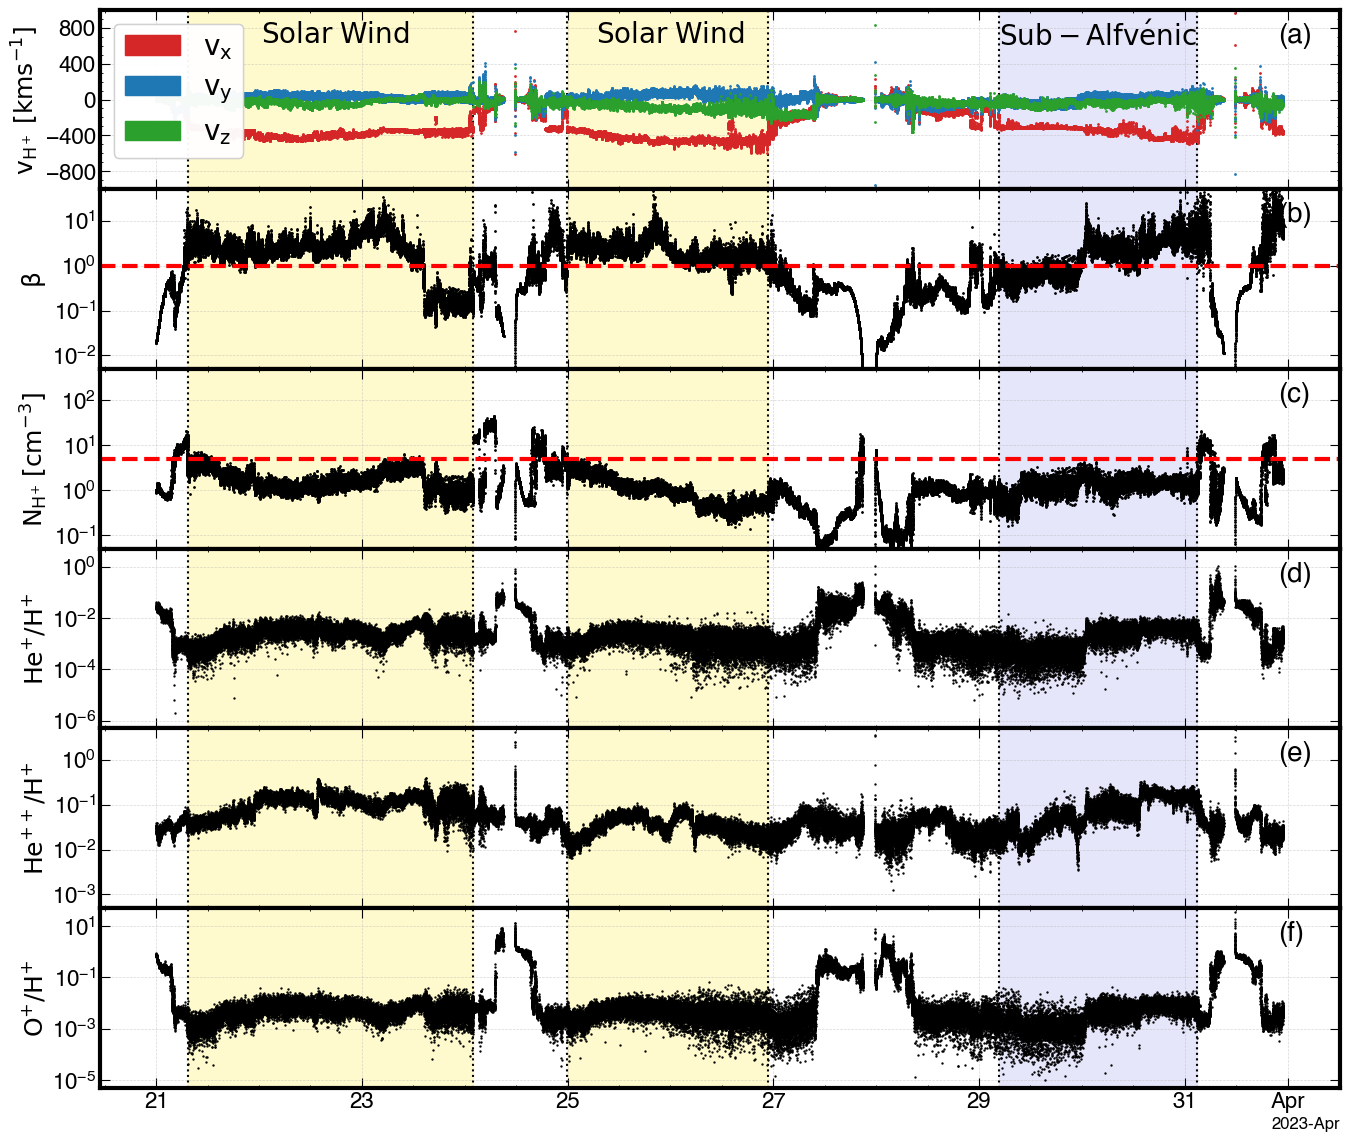

In [7]:
### FIGURE SETUP
fig = plt.figure(figsize=(16, 14))
grid = plt.GridSpec(6, 1, hspace=0, wspace=0.05)
lw=1
ss=1
swc = 'lemonchiffon'
ylabels = [r'$\rm v_{H^+} \; [km s^{-1}]$', r'$\rm \beta$', r'$\rm N_{H^{+}} \; [cm^{-3}]$']

regions = [# (magnetosphere.TimeOut[1], magnetosphere.TimeIn[2], swc), 
            (magnetosphere.TimeOut[8], magnetosphere.TimeIn[12], swc), 
            (magnetosphere.TimeOut[3], magnetosphere.TimeIn[5], swc),
             (magnetosphere.TimeOut[18], magnetosphere.TimeIn[20], scol)]

lines = [# magnetosphere.TimeOut[1], magnetosphere.TimeIn[2], 
            magnetosphere.TimeOut[8], magnetosphere.TimeIn[12], 
            magnetosphere.TimeOut[3], magnetosphere.TimeIn[5],
            magnetosphere.TimeOut[18], magnetosphere.TimeIn[20]]


#### ------ PANEL ONE: PROTON VELOCITY ------ ####
ax = plt.subplot(grid[0])

### DATA ###
ax.scatter(mms.Time, mms.hpvx, c='tab:red', lw=lw, label=r'$\rm v_x$', s=ss)
ax.scatter(mms.Time, mms.hpvy, c='tab:blue', lw=lw, label=r'$\rm v_y$', s=ss)
ax.scatter(mms.Time, mms.hpvz, c='tab:green', lw=lw, label=r'$\rm v_z$', s=ss)

### LEGEND ###
R_patch = mpatches.Patch(color='tab:red', label=r'$\rm v_x$')
T_patch = mpatches.Patch(color='tab:blue', label=r'$\rm v_y$')
N_patch = mpatches.Patch(color='tab:green', label=r'$\rm v_z$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
ax.add_artist(leg0)

### AXES LABELS ###
ax.set(ylim=(-1000, 1000), yticks=np.arange(-800, 801, step=400))
ax.set_ylabel(ylabels[0], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

### SHADE SOLAR WIND PORTIONS ###
for line in lines:
    ax.axvline(line, color='k', linestyle='dotted', zorder=-2)
for region in regions:
    ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xticklabels([])

#### ------ PANEL TWO: BETA ------ ####
ax = plt.subplot(grid[1])
### DATA ###
ax.scatter(mms.Time, mms.betap, c='k', lw=lw, label=r'$\rm \beta_P$', s=ss)

### AXES LABELS ###
ax.set_yscale('log')
ax.set_ylabel(ylabels[1], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.axhline(1, color='red', linestyle='dashed', lw=3)
ax.set(ylim=(5e-3, 5e1), yticks=[1e-2, 1e-1, 1e0, 1e1])

### SHADE SOLAR WIND PORTIONS ###
for line in lines:
    ax.axvline(line, color='k', linestyle='dotted', zorder=-2)
for region in regions:
    ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.sharex(plt.subplot(grid[1, :]))
ax.set_xticklabels([])

#### ------ PANEL THREE: PROTON DENSITY ------ ####
ax = plt.subplot(grid[2])
### DATA ###
ax.scatter(mms.Time, mms.hpN, c='k', lw=lw, label=r'$\rm N_P$', s=ss)

### AXES LABELS ###
ax.set_yscale('log')
ax.set_ylabel(ylabels[2], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.axhline(5, color='red', linestyle='dashed', lw=3)
ax.set(ylim=(5e-2, 5e2), yticks=[1e-1, 1e0, 1e1, 1e2])

### SHADE SOLAR WIND PORTIONS ###
for line in lines:
    ax.axvline(line, color='k', linestyle='dotted', zorder=-2)
for region in regions:
    ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(c)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xticklabels([])


#### ------ PANELS FIVE TO SEVEN: PARTICLE ABUNDANCE ------ ####
data = [mms.hepN/mms.hpN,  mms.heppN/mms.hpN,  mms.opN/mms.hpN]
ylabels = [r'$\rm He^{+} / H^{+}$', r'$\rm He^{++} / H^{+}$', r'$\rm O^{+} / H^{+}$']
panels = ['(d)', '(e)', '(f)', '(g)']

### PLOT DATA
ax2, ax3, ax4 = plt.subplot(grid[3]), plt.subplot(grid[4]), plt.subplot(grid[5])
for i, ax in enumerate([ax2, ax3, ax4]):
    ax.scatter(mms.Time, data[i], c='k', lw=lw, s=0.5)
    ax.tick_params(axis='both', which='major', labelsize=16) 
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_yscale('log')
    ax.set_ylabel(ylabels[i], fontsize=18)
    ### ADD PANEL LABELS ###
    ax.text(0.95, 0.93, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ### SHADE SOLAR WIND PORTIONS ###
    for line in lines:
        ax.axvline(line, color='k', linestyle='dotted', zorder=-2)
    for region in regions:
        ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

### AXES TICK MARKS
ax2.set(ylim=(5e-7, 5e0), yticks=[1e-6, 1e-4, 1e-2, 1e0])
ax3.set(ylim=(5e-4, 5e0), yticks=[1e-3, 1e-2, 1e-1, 1e0])
ax4.set(ylim=(5e-6, 5e1), yticks=[1e-5, 1e-3, 1e-1, 1e1])

##### ---------- LABEL REGIONS OF INTEREST ---------- ######
ax = plt.subplot(grid[0, :])
ax.text(0.13, 0.93, r'$\rm Solar \; Wind$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.40, 0.93, r'$\rm Solar \; Wind$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.725, 0.94, r'$\rm Sub-Alfv\'enic$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

##### ---------- SAVE FIGURE ---------- ######
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig7.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig7.eps')), bbox_inches='tight')

In [ ]:

# #### ------ PANEL THREE: He+ ------ ####
# ### PERIOD ONE ###
# ax = plt.subplot(grid[2, 0])
# ax.text(0.93, 0.93, '(c)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# # ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
# ax.set_yscale('log')
# ax.set_xticklabels([])

#  ### PERIOD ONE ###
# ax = plt.subplot(grid[2, 1])
# ax.text(0.93, 0.93, '(f)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set_yscale('log')
# ax.set_xticklabels([])
# ax.set_yticklabels([])


# #### ------ PANEL FOUR: He++ ------ ####
# ### PERIOD ONE ###
# ax = plt.subplot(grid[3, 0])
# ax.text(0.93, 0.93, '(d)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# # ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
# ax.set_yscale('log')
# ax.set_xticklabels([])

#  ### PERIOD ONE ###
# ax = plt.subplot(grid[3, 1])
# ax.text(0.93, 0.93, '(g)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set_yscale('log')
# ax.set_xticklabels([])
# ax.set_yticklabels([])

# #### ------ PANEL FIVE: O+ ------ ####
# ### PERIOD ONE ###
# ax = plt.subplot(grid[4, 0])
# ax.text(0.93, 0.93, '(e)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
# # ax.set_yscale('log')

#  ### PERIOD ONE ###
# ax = plt.subplot(grid[4, 1])
# ax.text(0.93, 0.93, '(h)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# # ax.set_yscale('log')
# ax.set_yticklabels([])

# Original Figure

In [ ]:
### FIGURE SETUP
fig = plt.figure(figsize=(16, 12))
grid = plt.GridSpec(5, 2, hspace=0.05, wspace=0.05)
lw=1
ss=1
swc = 'gold'
tspan = [magnetosphere.TimeOut[8], magnetosphere.TimeIn[12], magnetosphere.TimeOut[18], magnetosphere.TimeIn[20]]
ylabels = [r'$\rm v_p \; [km s^{-1}]$', r'$\rm N_{H^{+}} \; [cm^{-3}]$',
r'$\rm He^{+} / H^{+}$', r'$\rm He^{++} / H^{+}$', r'$\rm O^{+} / H^{+}$']
data = [hpca.hpN, hpca.hepN/hpca.hpN,  hpca.heppN/hpca.hpN,  hpca.opN/hpca.hpN]

#### ------ PANEL ONE: PROTON VELOCITY ------ ####
ax = plt.subplot(grid[0, :])
### DATA ###
ax.scatter(hpca.Time, hpca.hpvx, c='tab:red', lw=lw, label=r'$\rm v_x$', s=ss)
ax.scatter(hpca.Time, hpca.hpvy, c='tab:blue', lw=lw, label=r'$\rm v_y$', s=ss)
ax.scatter(hpca.Time, hpca.hpvz, c='tab:green', lw=lw, label=r'$\rm v_z$', s=ss)

### LEGEND ###
R_patch = mpatches.Patch(color='tab:red', label=r'$\rm v_x$')
T_patch = mpatches.Patch(color='tab:blue', label=r'$\rm v_y$')
N_patch = mpatches.Patch(color='tab:green', label=r'$\rm v_z$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
ax.add_artist(leg0)

### AXES LABELS ###
ax.set(ylim=(-1000, 1000), yticks=np.arange(-800, 801, step=400))
ax.set_ylabel(ylabels[0], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

### SHADE SOLAR WIND PORTIONS ###
ax.axvspan(tspan[0], tspan[1], color='palegreen', zorder=-3)
ax.axvspan(tspan[2], tspan[3], color='palegreen', zorder=-3)
for line in tspan:
    ax.axvline(line, color='k', linestyle='dotted', zorder=-2)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.sharex(plt.subplot(grid[1, :]))
ax.set_xticklabels([])

#### ------ PANEL TWO: PROTON DENSITY ------ ####
ax = plt.subplot(grid[1, :])
### DATA ###
ax.scatter(hpca.Time, hpca.hpN, c='k', lw=lw, label=r'$\rm N_P$', s=ss)

### AXES LABELS ###
ax.set(ylim=(1e-2, 1e2))
ax.set_yscale('log')
ax.set_ylabel(ylabels[1], fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.axhline(5, color='red', linestyle='dashed', lw=3)

### SHADE SOLAR WIND PORTIONS ###
ax.axvspan(tspan[0], tspan[1], color='palegreen', zorder=-3)
ax.axvspan(tspan[2], tspan[3], color='palegreen', zorder=-3)
for line in tspan:
    ax.axvline(line, color='k', linestyle='dotted', zorder=-2)

### ADD PANEL LABELS ###
ax.text(0.95, 0.93, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

#### ------ PANELS THREE TO FIVE: PARTICLE ABUNDANCE ------ ####
for i in np.arange(2, 5):
    for j in np.arange(0, 2):
        ax = plt.subplot(grid[i, j])
        ax.scatter(hpca.Time, data[i-1], c='k', lw=lw, s=2)
        ax.tick_params(axis='both', which='major', labelsize=16) 
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
        if j == 0:
            ax.set_ylabel(ylabels[i], fontsize=18)
            ax.set_xlim(tspan[0], tspan[1])
        if j == 1:
            ax.set_xlim(tspan[2], tspan[3])
       

#### ------ PANEL THREE: He+ ------ ####
### PERIOD ONE ###
ax = plt.subplot(grid[2, 0])
ax.text(0.93, 0.93, '(c)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
ax.set_yscale('log')
ax.set_xticklabels([])

 ### PERIOD ONE ###
ax = plt.subplot(grid[2, 1])
ax.text(0.93, 0.93, '(f)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])


#### ------ PANEL FOUR: He++ ------ ####
### PERIOD ONE ###
ax = plt.subplot(grid[3, 0])
ax.text(0.93, 0.93, '(d)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
ax.set_yscale('log')
ax.set_xticklabels([])

 ### PERIOD ONE ###
ax = plt.subplot(grid[3, 1])
ax.text(0.93, 0.93, '(g)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_yticklabels([])

#### ------ PANEL FIVE: O+ ------ ####
### PERIOD ONE ###
ax = plt.subplot(grid[4, 0])
ax.text(0.93, 0.93, '(e)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))
# ax.set_yscale('log')

 ### PERIOD ONE ###
ax = plt.subplot(grid[4, 1])
ax.text(0.93, 0.93, '(h)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set_yscale('log')
ax.set_yticklabels([])

### SAVE FIGURE ###
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig7.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig7.eps')), bbox_inches='tight')